<a href="https://colab.research.google.com/github/claredavies/MachineLearningCoursework/blob/main/Assignment3/MotionDetectionKMeanClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline

np.random.seed(123)

In [2]:
!unzip "UCI HAR Dataset.zip"

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI HAR Dataset/test/
   creating: UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
   creating: __MACOSX/UCI HAR Dataset/test/
   creating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/
  inflating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating: UCI HAR

In [3]:
# get the features from the file features.txt
features = list()
with open('UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = [features]
# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
Data = X_train
Data['activity'] = y_train
Data['activityName'] = y_train_labels

No of Features: 561


In [4]:
Data.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity,activityName
1174,0.292313,-0.004602,-0.093035,-0.975666,-0.953662,-0.898589,-0.978649,-0.948310,-0.887290,-0.905634,-0.550026,-0.752209,0.827741,0.681587,0.809601,-0.939233,-0.999557,-0.999132,-0.993726,-0.981287,-0.953042,-0.876416,-0.062111,-0.207424,-0.042672,0.025585,0.035539,0.209007,-0.093377,-0.001026,-0.068364,0.310786,-0.367466,0.022099,-0.036577,0.240447,-0.501685,0.430212,0.187236,0.737611,...,-1.000000,0.235242,-0.651162,-0.905009,-0.928418,-0.944700,-0.929657,-0.962163,-0.996422,-0.928418,-0.997367,-0.924863,-0.198627,-0.743590,0.156731,-0.677367,-0.912596,-0.950437,-0.958459,-0.950225,-0.972155,-0.972714,-0.950437,-0.998731,-0.946799,-0.431083,-1.000000,0.125986,-0.582962,-0.889985,-0.016318,0.130722,0.298647,0.055418,-0.681969,0.270244,0.157509,6,5,STANDING
1556,0.308907,-0.037327,-0.134571,-0.205253,0.140363,0.048250,-0.216939,0.064417,0.048677,0.126622,-0.159842,-0.220137,0.361536,-0.145002,0.190793,0.015430,-0.682764,-0.748319,-0.507273,-0.238987,-0.296899,-0.008865,0.302629,0.451106,0.268471,-0.167518,0.029739,0.219143,-0.114834,0.030761,0.077770,0.212571,-0.007023,-0.023384,0.071789,0.278798,-0.370086,-0.449585,-0.132153,0.705448,...,-0.873016,0.080293,0.115264,-0.224239,-0.047593,-0.277676,-0.230142,-0.307951,-0.683753,-0.047593,-0.580159,-0.349394,0.765532,-0.794872,0.441491,-0.366573,-0.674798,0.031069,0.208143,0.325476,0.088429,-0.199897,0.031069,-0.339648,0.069181,0.716316,-0.873016,0.104737,-0.186753,-0.592584,-0.351819,0.748747,-0.602342,-0.504075,-0.842483,0.207037,0.015731,7,1,WALKING
3994,0.270290,-0.029851,-0.093731,-0.976067,-0.916127,-0.938908,-0.975743,-0.907796,-0.932168,-0.931917,-0.545747,-0.792702,0.823446,0.646450,0.823687,-0.941413,-0.999602,-0.998052,-0.997185,-0.975926,-0.914927,-0.919956,-0.362433,-0.377194,-0.140949,0.040632,-0.036266,0.017383,-0.181466,-0.177269,0.138113,0.016899,-0.089413,0.053372,-0.122245,0.092800,-0.072852,0.840731,0.858709,0.835176,...,-1.000000,0.284048,-0.463481,-0.747104,-0.969956,-0.950886,-0.955832,-0.950943,-0.993809,-0.969956,-0.998736,-0.981084,-0.564433,-1.000000,-0.478659,-0.014392,-0.402564,-0.984

In [5]:
print('Shape of the data set: ' + str(Data.shape))

Shape of the data set: (7352, 564)


In [9]:
#save labels as string
Data = Data.drop(['rn', 'activity','activityName'], axis = 1)
Labels_keys = y_train_labels.unique().tolist()
Labels = np.array(y_train_labels)
print('Activity labels: ' + str(Labels_keys))

Activity labels: ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [10]:
#check for missing values
Temp = pd.DataFrame(Data.isnull().sum())
Temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Amount of rows with missing values: 0


In [11]:
#normalize the dataset
scaler = StandardScaler()
Data = scaler.fit_transform(Data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


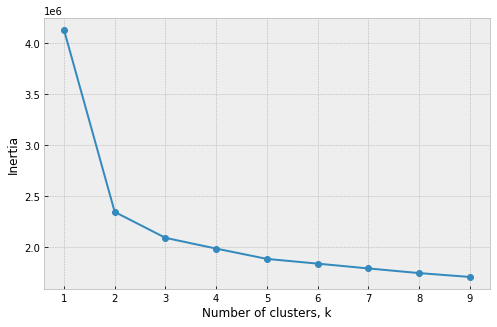

In [12]:
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(Data)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

**Looks like the best value ("elbow" of the line) for k is 2 (two clusters).**

In [13]:
def k_means(n_clust, data_frame, true_labels):
    k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
    k_means.fit(data_frame)
    c_labels = k_means.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    y_clust = k_means.predict(data_frame)
    display(ct)
    print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     silhouette')
    print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
      %(k_means.inertia_,
      homogeneity_score(true_labels, y_clust),
      completeness_score(true_labels, y_clust),
      v_measure_score(true_labels, y_clust),
      adjusted_rand_score(true_labels, y_clust),
      adjusted_mutual_info_score(true_labels, y_clust),
      silhouette_score(data_frame, y_clust, metric='euclidean')))

*More on clustering metrics can be found in [DataCamp Tutorial](https://www.datacamp.com/community/tutorials/machine-learning-python).*

In [14]:
k_means(n_clust=2, data_frame=Data, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,1396,1285,1374,0,0,8
1,11,1,0,1226,986,1065


inertia  homo    compl   v-meas   ARI     AMI     silhouette
2343544   0.376   0.976   0.543   0.328   0.543    0.396


**It looks like algorithm found patterns for Moving and Not-Moving activity with high level of accuracy.**

**Check how it will cluster by 6 clusters (original number of classes).**

In [15]:
k_means(n_clust=6, data_frame=Data, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,4,1,0,643,200,854
1,272,310,364,0,0,2
2,0,0,0,68,167,5
3,0,0,0,515,619,212
4,1105,94,0,0,0,0
5,26,881,1010,0,0,0


inertia  homo    compl   v-meas   ARI     AMI     silhouette
1826033   0.540   0.577   0.558   0.419   0.557    0.108


**Doesn't look like good connection between clusters and original labels so I will stick with 2 clusters.**

In [19]:
#change labels into binary: 0 - not moving, 1 - moving
Labels_binary = Labels.copy()
for i in range(len(Labels_binary)):
    if (Labels_binary[i] == 'STANDING' or Labels_binary[i] == 'SITTING' or Labels_binary[i] == 'LAYING'):
        Labels_binary[i] = 0
    else:
        Labels_binary[i] = 1
Labels_binary = np.array(Labels_binary.astype(int))

In [ ]:
k_means(n_clust=2, data_frame=Data, true_labels=Labels_binary)

### Principal component analysis (PCA)

> Principal Component Analysis is a dimension-reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set.

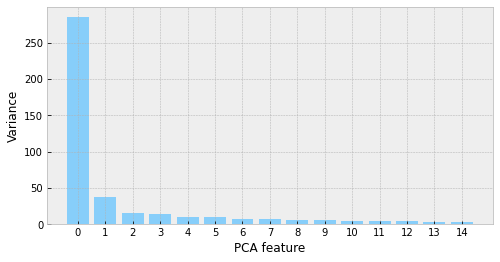

In [20]:
#check for optimal number of features
pca = PCA(random_state=123)
pca.fit(Data)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

**1 feature seems to be best fit for our algorithm.**

In [21]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=123)
    global Data_reduced
    Data_reduced = pca.fit_transform(Data)
    print('Shape of the new Data df: ' + str(Data_reduced.shape))

In [22]:
pca_transform(n_comp=1)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (7352, 1)


orig_label,0,1
clust_label,,
0,10,3268
1,4057,17


inertia  homo    compl   v-meas   ARI     AMI     silhouette
322061   0.965   0.965   0.965   0.985   0.965    0.803


**Inertia and Silhouette seems to be much better now after reduction. **

**Just check clustering model for 2 components.**


In [23]:
pca_transform(n_comp=2)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (7352, 2)


orig_label,0,1
clust_label,,
0,14,3278
1,4053,7


inertia  homo    compl   v-meas   ARI     AMI     silhouette
584503   0.972   0.972   0.972   0.989   0.972    0.702
